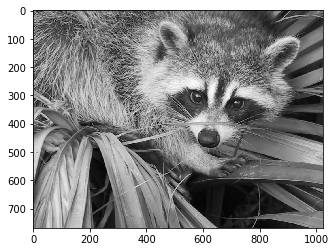

(768, 1024)


numpy.ndarray

In [58]:
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np
face = misc.face(gray=True) #On génère une image de scipy

#Affichage d'image
plt.imshow(face, cmap=plt.cm.gray)
plt.show()
print(face.shape) #Taille
type(face) #Type d'image

In [59]:
h = face.shape[0]
w = face.shape[1]
print(f"Longueur : {h}, Largeur : {w}")
face

Longueur : 768, Largeur : 1024


array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

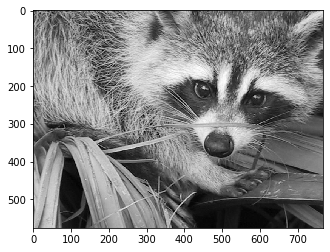

In [3]:
#Zoomer l'image
zoom_face = face[h//8 : -h//8, w//8 : -w//8]
plt.gray() #Couuleur gris
plt.imshow(zoom_face)
plt.show()

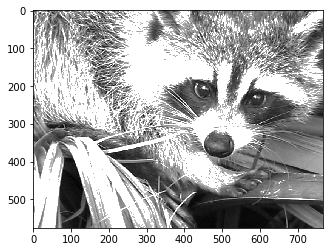

In [4]:
#Tous les pixels > 150, on les met à 200 (augmenter la luminosité)
zoom_face[zoom_face > 150] = 200
plt.imshow(zoom_face)
plt.show()

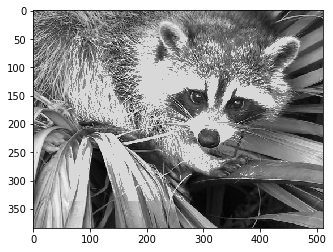

In [5]:
face  = face[::2, ::2]
plt.imshow(face)
plt.show()

In [6]:
def f(x):
    return x**2 - 2*x + 1

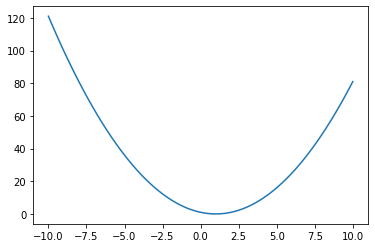

In [7]:
x = np.linspace(-10, 10, 100)
plt.plot(x, f(x))

In [8]:
from scipy import optimize

In [9]:
res = optimize.minimize(f, x0=-5).x #Reduction de l'erreur
res

array([0.99999995])

(32, 32)

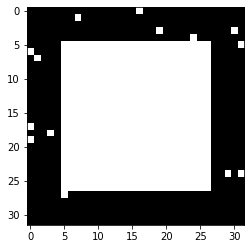

In [10]:
from scipy import ndimage #Module pour le traitement d'image
np.random.seed(0)

#On génère une image de scipy
x = np.zeros((32, 32))
x[5:-5, 5:-5] = 1
x[np.random.randint(0, 32, 30),np.random.randint(0, 32, 30)] = 1
plt.imshow(x) #On l'affiche
x.shape

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

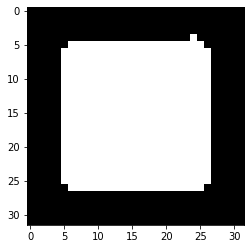

In [11]:
open_x = ndimage.binary_opening(x) #Suppression des petites carrées autour
plt.imshow(open_x)
open_x

(750, 1000, 3)

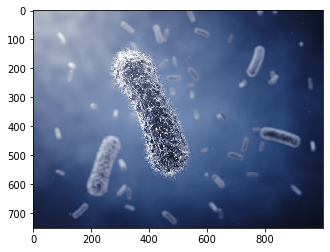

In [12]:
my_pic = plt.imread("virus.jpg", format='jpg') #Chargement de l'image
plt.imshow(my_pic) #On affiche l'image
my_pic.shape #La taille de l'image

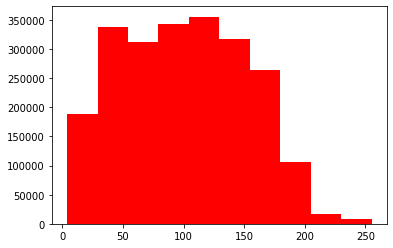

In [13]:
my_pic2 = np.copy(my_pic) #On crée une copie

#Applatir l'image avec 'ravel()' et une catégorie(bins) pour l'histogramme
plt.hist(my_pic2.ravel(), bins=10, color='red')
plt.show()

In [14]:
# my_pic = my_pic < 0.5
# plt.imshow(my_pic)
# open_x = ndimage.binary_opening(my_pic) #Suppression des petites carrées autour
# plt.imshow(open_x)

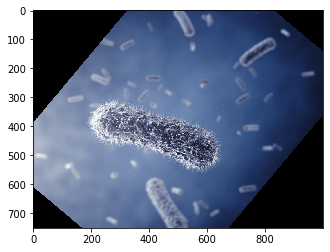

In [15]:
#Arrondie de l'image sans faire de redimensionnement
img_rotate = ndimage.rotate(my_pic, 50, reshape=False)
plt.imshow(img_rotate)

In [16]:
label_image, n_labels = (ndimage.label(my_pic)) #L'image et une étiquette(int) pour chaque image
n_labels

1

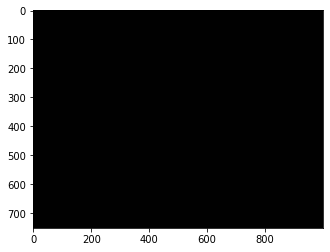

In [17]:
plt.imshow(label_image)

In [18]:
sizes = ndimage.sum(my_pic, label_image, range(n_labels)) #Compter les pixels d'une image
sizes

array([0.])

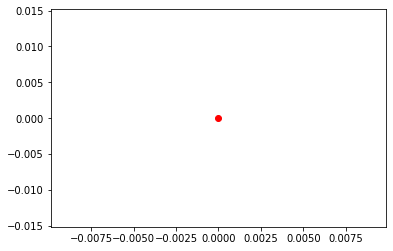

In [19]:
plt.scatter(range(n_labels), sizes, c='red')

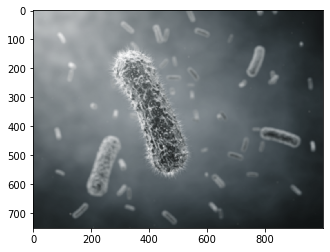

In [20]:
uniform_filtre = ndimage.uniform_filter(my_pic, size=5)
plt.imshow(uniform_filtre)

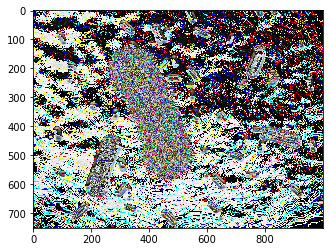

In [21]:
sobel_image = ndimage.sobel(my_pic, axis=0)
plt.imshow(sobel_image)

# Indexing, Slicing and Subsetting
👇👇👇

In [22]:
A = np.zeros((4, 4))
A

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

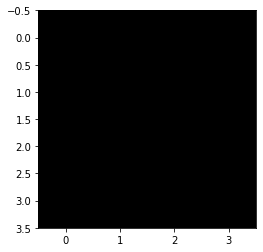

In [23]:
plt.imshow(A)

In [24]:
#A[rows, cols] or A[debut:fin, debut:fin]
A[1:3, 1:3] = 1
A

array([[0., 0., 0., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 0., 0., 0.]])

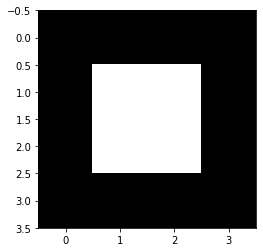

In [25]:
plt.imshow(A)

In [26]:
C = np.zeros((5,5))
C

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [27]:
#C[debut,debut,pas; debut,debut,pas]
C[::2, ::2] = 1
C

array([[1., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1.]])

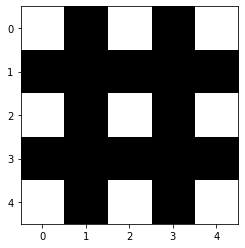

In [28]:
plt.imshow(C)

In [29]:
B = np.random.randint(0, 10, [6, 6])
print(B.shape)
B

(6, 6)


array([[3, 2, 7, 2, 0, 0],
       [4, 5, 5, 6, 8, 4],
       [1, 4, 9, 8, 1, 1],
       [7, 9, 9, 3, 6, 7],
       [2, 0, 3, 5, 9, 4],
       [4, 6, 4, 4, 3, 4]])

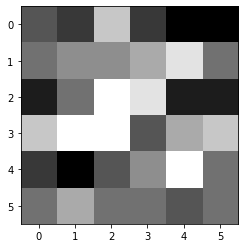

In [30]:
#Plus le pixel est petit, plus c'est du noir
#Plus il est élévé, plus c'est blanc
plt.imshow(B)

In [31]:
B[(B < 9) & (B > 5)] = 0
B

array([[3, 2, 0, 2, 0, 0],
       [4, 5, 5, 0, 0, 4],
       [1, 4, 9, 0, 1, 1],
       [0, 9, 9, 3, 0, 0],
       [2, 0, 3, 5, 9, 4],
       [4, 0, 4, 4, 3, 4]])

In [32]:
B[B < 5]

array([3, 2, 0, 2, 0, 0, 4, 0, 0, 4, 1, 4, 0, 1, 1, 0, 3, 0, 0, 2, 0, 3,
       4, 4, 0, 4, 4, 3, 4])

# Scikit-Image

In [33]:
from skimage import io, data
import skimage.segmentation as seg

Taille : (2618, 2815, 3)
Pixel min : 0
Pixel max : 255



dtype('uint8')

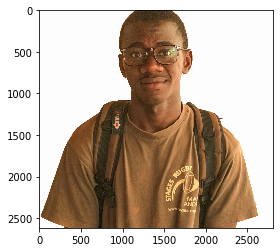

In [34]:
img = io.imread("my.JPG", format='jpg')
plt.imshow(img)
print(f"Taille : {img.shape}\nPixel min : {img.min()}\nPixel max : {img.max()}\n")
img.dtype

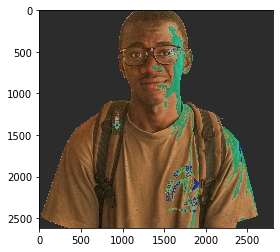

In [35]:
#On reduit les pixels blancs
img[img > 200] = 300
plt.imshow(img)

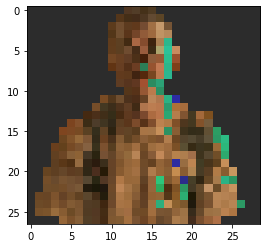

In [36]:
#Effect de filtre
img1 = img[::100, ::100]
plt.imshow(img1)

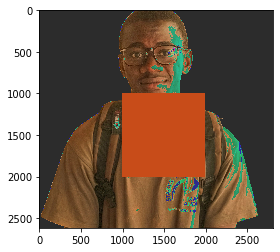

In [37]:
img[1000:2000, 1000:2000, :] = [200, 76, 25] #[red, green blue]
plt.imshow(img)

In [38]:
imgCollection = io.ImageCollection('*.jpg', format='jpg')
type(imgCollection)

skimage.io.collection.ImageCollection

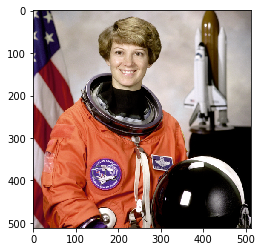

In [39]:
myImg = data.astronaut()
plt.imshow(myImg)
plt.show()

In [46]:
def circle_points(resolution, center, raduis):
    radians = np.linspace(0, 2*np.pi, resolution)
    
    c = center[1] + raduis*np.cos(radians)
    r = center[1] + raduis*np.sin(radians)
    
    return np.array([c, r]).T

points = circle_points(200, [100, 220], 100)[:-1]

In [47]:
snake = seg.active_contour(myImg, points)

In [55]:
def image_show(image, nrows=1, ncols=1, cmap='gray', **kwargs):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5, 5))
    ax.imshow(image, cmap='gray')
    ax.axis('on')
    
    return fig, ax

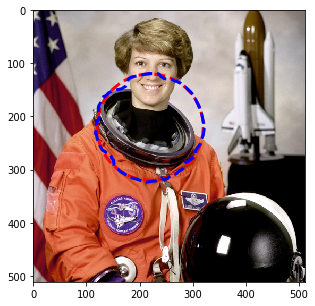

In [56]:
fig, ax = image_show(myImg)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '--b', lw=3)